# THỰC HÀNH 4: PHÂN VÙNG ẢNH

# 1. CÀI ĐẶT THƯ VIỆN

In [68]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. VIẾT CHƯƠNG TRÌNH PHÂN VÙNG ẢNH

### 2.1 Phân vùng ảnh theo histogram

#### 2.1.1 Phương pháp Ostu

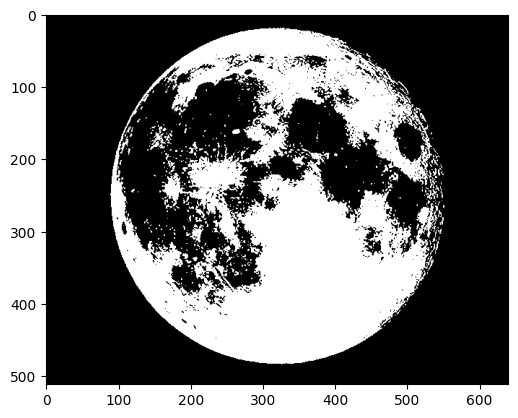

In [171]:
from PIL import Image
import numpy as np
import imageio.v2  as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('moon.jpg').convert('L')
a = np.array(data)
# performing Otsu thresholding
thres = threshold_otsu(a)
#pixel with intensity greater than theeshold are keep
b = a > thres
b = Image.fromarray(b)

plt.imshow(b)
plt.show()


#### 2.1.2 Phương pháp Adaptive Thesholding

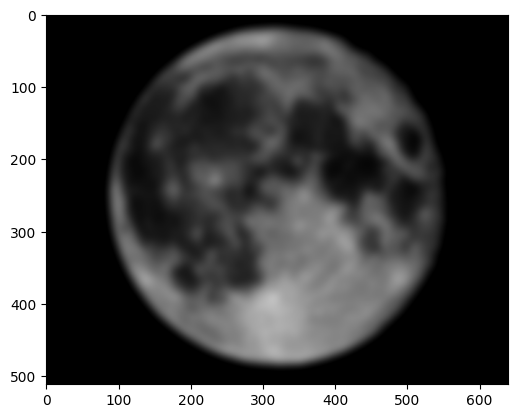

In [22]:
from PIL import Image
import numpy as np
import imageio.v2  as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_local

data = Image.open('moon.jpg').convert('L')
a = np.array(data)
thres = threshold_local(a)
#performing local thresholding
b = threshold_local(a, 39, offset=10)
b = Image.fromarray(b)

plt.imshow(b)
plt.show()

### 2.2 Phân vùng theo region

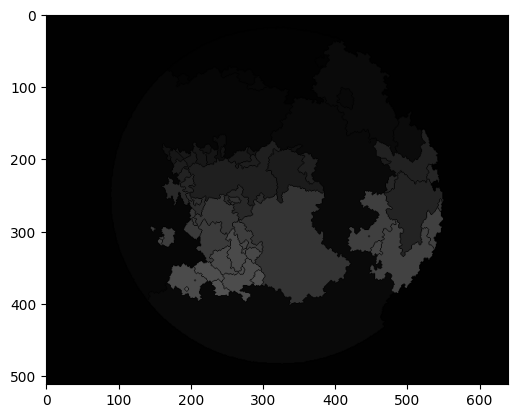

In [71]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = cv2.imread('moon.jpg')
# converting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
# thresholding the image to obtain cell pixels
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# since Otsu’s method has over segmented the image
# erosion operation is performed
b2 = cv2.erode(b1, None, iterations = 2)
# distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)
# thresholding the distance transform image to obtain
# pixels that are foreground
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
# performing labeling
labelled, ncc = label(dt)
# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)
# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()


### 2.3 Biến đổi đối tượng trong ảnh

#### 2.3.1 Sử dụng binary_dilation

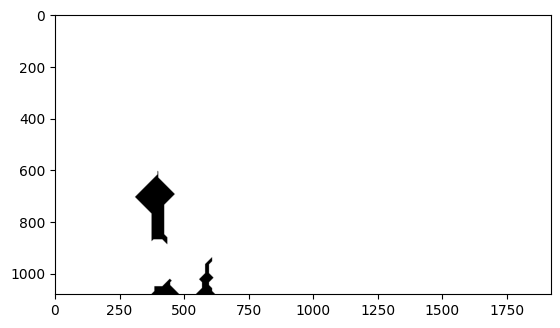

In [ ]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('city.gif').convert('L')
b = nd.binary_dilation(data, iterations=50)
c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

#### 2.3.2 Sử dụng binary_opening

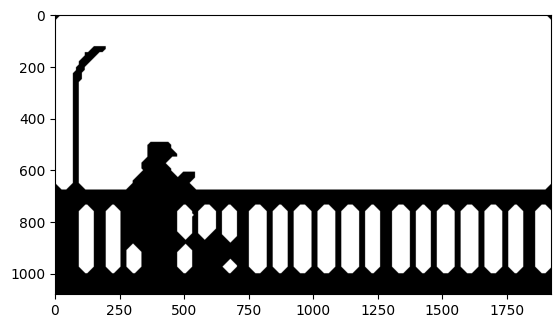

In [73]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('city.gif').convert('L')
# defining structuring element
s = [[0,1,0],[1,1,1],[0,1,0]]
b = nd.binary_opening(data,  structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

#### 2.3.3 Sử dụng binary_erosion

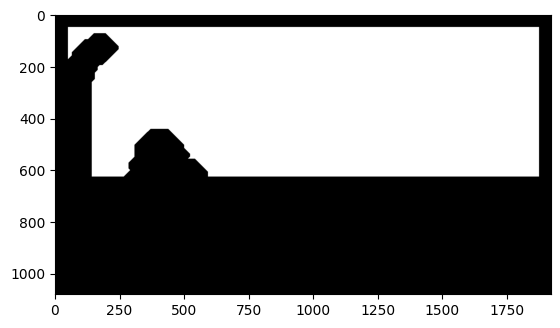

In [74]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('city.gif').convert('L')
# defining structuring element
s = [[0,1,0],[1,1,1],[0,1,0]]
b = nd.binary_erosion(data,  structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

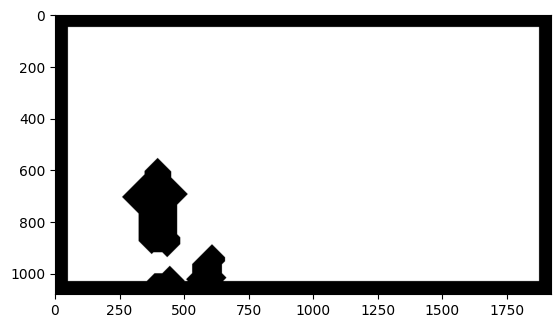

In [75]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('city.gif').convert('L')
# defining structuring element
s = [[0,1,0],[1,1,1],[0,1,0]]
b = nd.binary_closing(data,  structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

## 3. BÀI TẬP

#### 1.Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng LangBiang theo ngưỡng 0.3. Lưu vào máy với tên lang_biang.jpg và hiển thị trên màn hình.

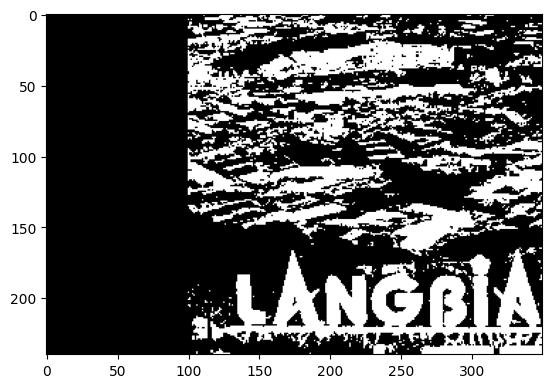

In [4]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)
bmg = a[100:340, 100:450]
bmg = nd.shift(bmg, (0, 100))
thres = threshold_otsu(a)
d = bmg > thres
iio.imsave('lang_biang.jpg', (d.astype(np.uint8) * 255))
plt.imshow(d, cmap='gray')
plt.show()



#### 2. Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise. Xoay đối tượng vừa chọn 1 góc 45° và dùng phương pháp Adaptive Thresholding với ngưỡng 60 và lưu vào máy với tên là ho_xuan_huong.jpg.

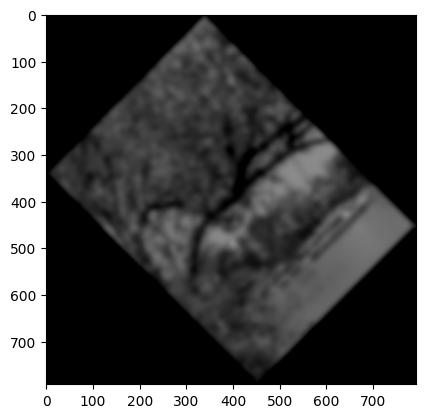

In [2]:
from PIL import Image 
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)
bmg = a[40:680, 510:990]
d = nd.rotate(bmg, 45)
a = np.array(d)
b = threshold_local(a, 39, offset=60)
b = Image.fromarray(b)
iio.imsave("ho_xuan_huong.jpg", b.convert('L'))
plt.imshow(b)
plt.show()

#### 3.Viết chương trình chọn Quảng trường Lâm Viên trong ảnh Đà Lạt từ thư mục exercise. Dùng phương pháp Coordinate Mapping và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên là quan_truong_lam_vien.jpg.

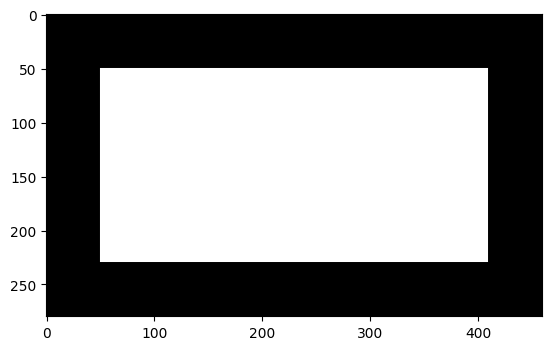

In [29]:
from PIL import Image 
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)
bmg = a[50:330, 1010:1470]
V, H = bmg.shape
M = np.indices((V, H))
d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(bmg, mp)
s = ([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
b = nd.binary_closing(d1, structure=s, iterations=50)
c  = Image.fromarray(b)
iio.imsave("quang_truong_lam_vien.jpg", c.convert('L'))
plt.imshow(c, cmap='gray')
plt.show()



### 4. Viết chương trình cho phép người dùng nhập chức năng muốn xử lý. Có thể chọn 1 chức năng duy nhất hoặc kết hợp 2 chức năng của geometric_tranformation và segment

geometric_transformation:
  1. Rotate
  2. Shift
  3. Coordinate_mapping
segment:
  4. Otsu
  5. Adaptive_thresholding
  6. Binary_dilation
  7. Binary_erosion
Nhập tối đa 2 số cách nhau bởi dấu phẩy (ví dụ: 1,2 nhập 1 số thì 3):


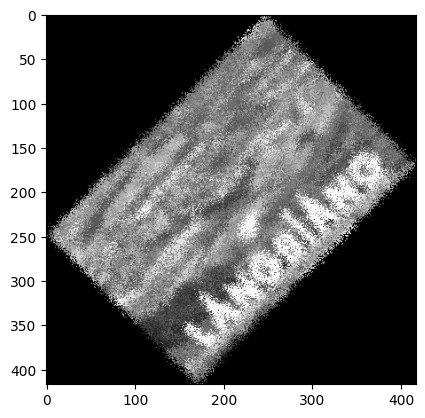

In [3]:
from PIL import Image
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import imageio.v2 as iio
from skimage.filters import threshold_otsu, threshold_local

# geometric_transformation
def rotate_image(image):
    return nd.rotate(image, 45)

def shift_image(image):
    return nd.shift(image, (0, 100))

def coordinate_mapping(image):
    V, H = image.shape
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.ranf(M.shape) - d
    mp = (M + q).astype(int)
    return nd.map_coordinates(image, mp)

# segment
def otsu_threshold(image):
    thres = threshold_otsu(image)
    return image > thres

def adaptive_threshold(image):
    b = threshold_local(image, 39, offset=60)
    return image > b

def binary_dilation(image):
    structure = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    return nd.binary_dilation(image, structure=structure)

def binary_erosion(image):
    structure = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    return nd.binary_erosion(image, structure=structure)

data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)
image = a[100:340, 100:450]

print("geometric_transformation:")
print("  1. Rotate")
print("  2. Shift")
print("  3. Coordinate_mapping")
print("segment:")
print("  4. Otsu")
print("  5. Adaptive_thresholding")
print("  6. Binary_dilation")
print("  7. Binary_erosion")
print("Nhập tối đa 2 số cách nhau bởi dấu phẩy (ví dụ: 1,2 nhập 1 số thì 3):")

lua_chon = input(">> ").strip().split(',')
result = image.copy()

for lc in lua_chon:
    lc = lc.strip()
    if lc == '1':
        result = rotate_image(result)
    elif lc == '2':
        result = shift_image(result)
    elif lc == '3':
        result = coordinate_mapping(result)
    elif lc == '4':
        result = otsu_threshold(result)
    elif lc == '5':
        result = adaptive_threshold(result)
    elif lc == '6':
        result = binary_dilation(result)
    elif lc == '7':
        result = binary_erosion(result)

plt.imshow(result, cmap='gray')
plt.show()